In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [17]:
df = pd.read_csv("AllData.csv")
df.set_index("CVEGEO", inplace=True)
df = df.drop(labels=["NOM_ENT", "NOM_MUN"], axis=1)

semaforo_mapping = {"Rojo": 2, "Amarillo": 1, "Verde": 0}
df["semaforo"] = df["semaforo"].map(semaforo_mapping)
df

print(df.isnull().sum()) 

df_cleaned = df.dropna()

POB_TOTAL              0
ALTITUD                0
AREA                   0
UMBRAL12H              0
PORCENTA_1             0
agua_AR                0
agua_FC                0
agua_PT                0
avg_impact             0
avg_agricultura        0
avg_construccion       0
avg_manufactura        0
semaforo            1423
dtype: int64


In [18]:
print(df_cleaned["semaforo"].unique())

[2. 0. 1.]


In [19]:
X = df_cleaned.drop(columns=["semaforo"])  
y = df_cleaned["semaforo"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


accuracy = rf_model.score(X_test, y_test)

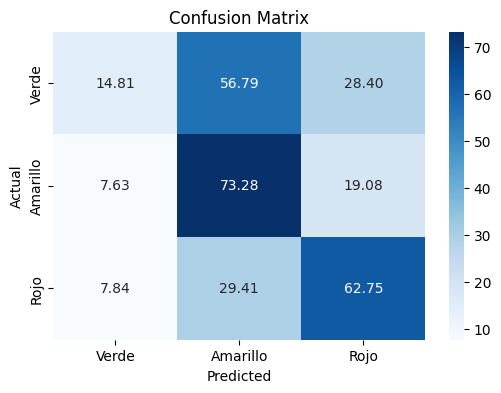

In [23]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

labels = ["Verde", "Amarillo", "Rojo"]

cm_percentage = cm.astype(np.float64) / cm.sum(axis=1, keepdims=True) * 100

# confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Verde", "Amarillo", "Rojo"]))

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

       Verde       0.40      0.15      0.22        81
    Amarillo       0.56      0.73      0.63       131
        Rojo       0.57      0.63      0.60       102

    accuracy                           0.55       314
   macro avg       0.51      0.50      0.48       314
weighted avg       0.52      0.55      0.51       314

Model Accuracy: 0.55
